# **Gradient Descent: Step by Step 2**

## **Import Required Libraries** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Make a Data**

In [2]:
from sklearn.datasets import make_regression

In [3]:
# Make a data for regression
X, y = make_regression(n_samples=100,
                       n_features=1,
                       n_informative=1,
                       n_targets=1,
                       noise=20,
                       random_state=0)

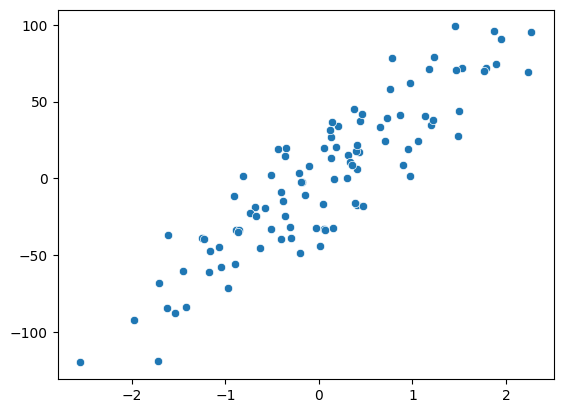

In [4]:
# Plot the data
sns.scatterplot(x=X.flatten(), y=y)
plt.show()

## **Train Test Split**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((70, 1), (30, 1))

## **Apply Linear Regression with Ordinary Least Squares (OLS)**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# Instantiate an object of the LinearRegression class
lin_reg = LinearRegression()

# Fit the data
lin_reg.fit(X, y)

LinearRegression()

In [9]:
# Print the coefficient value
print("Coefficient (m):", lin_reg.coef_)

Coefficient (m): [42.85335573]


In [10]:
# Print the intercept value
print("Intercept (b):", lin_reg.intercept_)

Intercept (b): -1.6283636540614514


In [11]:
# Calculate the accuracy on the test data
from sklearn.metrics import r2_score

In [12]:
y_pred = lin_reg.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.7819462181151239


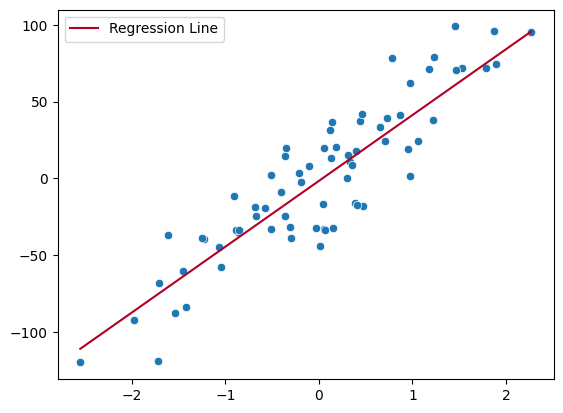

In [13]:
# Plot the regression line
sns.scatterplot(x=X_train.flatten(), y=y_train)
sns.lineplot(x=X_train.flatten(), y=lin_reg.predict(X_train), c="#b10026", label="Regression Line")
plt.show()

## **Apply Linear Regression with Gradient Descent**

In [14]:
# Create a class to apply gradient descent
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y):
        # Calculating the slope(m) and intercept(b) using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.learning_rate * loss_slope_b)
            self.m = self.m - (self.learning_rate * loss_slope_m)
            
        print("Coefficient (m):", self.m)
        print("Intercept (b):", self.b)
        
    def predict(self, X):
        return self.m * X + self.b

In [15]:
# Instantiate a GDRegressor object
gd = GDRegressor(learning_rate=0.001, epochs=50)

# Fit the data
gd.fit(X_train, y_train)

Coefficient (m): 44.289670464674224
Intercept (b): -0.7888266985484598


In [16]:
# Check the accuracy in the test dataset
y_pred = gd.predict(X_test)
print("R2 Score:", r2_score(y_test, gd.predict(X_test)))

R2 Score: 0.7736676864052329


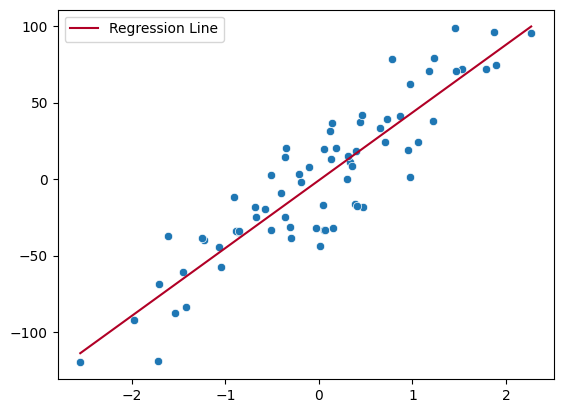

In [17]:
# Plot the regression line
sns.scatterplot(x=X_train.flatten(), y=y_train)
sns.lineplot(x=X_train.flatten(), 
             y=gd.predict(X_train).flatten(), 
             c="#b10026", label="Regression Line")
plt.show()